# Gesture Phase Detection using Unsupervised and Supervised Learning

In [1]:
%matplotlib inline
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import model_selection, metrics
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,X26,X27,X28,X29,X30,X31,X32,Phase
0,-0.005009,-0.000964,0.000573,0.008623,0.005667,0.001302,-0.000631,0.000130,-0.000048,0.007762,...,1.880800e-04,0.005133,0.010400,0.000646,0.007871,0.004631,0.000963,0.000092,0.000438,'D'
1,0.004905,0.001209,-0.000649,0.004737,0.003166,0.000819,-0.000572,-0.000015,0.000023,0.002706,...,-7.500000e-07,0.005093,0.005756,0.000573,0.003459,0.000730,0.000332,0.000012,0.000433,'D'
2,-0.002393,-0.000216,0.000136,0.003028,0.001212,0.000336,-0.000449,0.000017,0.000047,0.002868,...,-3.920000e-05,0.002406,0.003279,0.000452,0.003261,0.002412,0.000852,0.000042,0.000202,'D'
3,-0.001394,-0.000242,0.000056,0.001182,0.000575,0.000225,-0.000479,-0.000050,0.000104,0.001171,...,-3.184000e-05,0.001416,0.001334,0.000493,0.001358,0.000313,0.000611,0.000029,0.000596,'D'
4,-0.000156,-0.000004,0.000023,0.001585,0.000630,0.000094,-0.000303,0.000097,0.000065,0.001579,...,-2.015000e-05,0.000158,0.001709,0.000325,0.001714,0.000203,0.000069,0.000038,0.000069,'D'


In [4]:
df.shape

(9873, 33)

In [5]:
df.Phase.unique()

array(["'D'", "'P'", "'S'", "'H'", "'R'"], dtype=object)

In [6]:
# Delete the rows with label "P","D","R"
# For label-based deletion, set the index first on the dataframe:
df = df.set_index("Phase")
df = df.drop(["'P'", "'D'", "'R'"], axis=0)

In [7]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
Phase,,,,,,,,,,,,,,,,,,,,,
'S',-0.012755,0.016660,0.000505,0.009534,0.004022,-0.000355,-0.009288,0.013281,0.000577,0.009613,...,-0.001379,-0.000094,0.020988,0.010354,0.016217,0.010435,0.004264,0.001580,0.003233,0.001581
'S',-0.012634,0.014808,0.000632,-0.001678,0.003034,0.000300,-0.009234,0.011821,0.000656,-0.001617,...,-0.000320,0.000211,0.019476,0.003480,0.015015,0.003467,0.000600,0.003637,0.000472,0.003643
'S',-0.008327,0.010399,0.000753,-0.001399,0.001153,0.000354,-0.005991,0.008461,0.000756,-0.001339,...,-0.000588,0.000017,0.013344,0.001848,0.010395,0.001814,0.001926,0.000595,0.001460,0.000595
'S',0.004090,-0.005890,0.000244,-0.003479,0.003003,0.000916,0.003311,-0.003896,0.000351,-0.003446,...,0.000594,0.000180,0.007175,0.004686,0.005124,0.004668,0.006609,0.000916,0.004991,0.000921
'S',0.004367,-0.006456,0.000629,-0.000758,-0.003468,0.000625,0.003456,-0.004509,0.000637,-0.000760,...,-0.002091,-0.000095,0.007819,0.003604,0.005717,0.003606,0.000238,0.002267,0.000224,0.002265


In [8]:
df = df.reset_index()

In [9]:
df.rename(columns={'Phase': 'phase'}, inplace=True)

In [10]:
df.phase.unique()

array(["'S'", "'H'"], dtype=object)

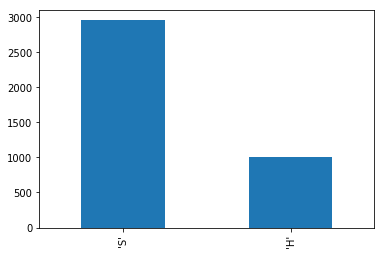

In [11]:
df['phase'].value_counts().plot(kind='bar')


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['phase'] = le.fit_transform(df['phase'])

In [13]:
df.phase.unique()

array([1, 0], dtype=int64)

In [14]:
df = df.sample(frac=1)

In [15]:
df.head()

,phase,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
3820,1,0.000506,-0.014290,0.002058,0.003493,0.010186,-0.001849,0.000216,-0.013003,0.001810,...,-0.000370,0.000086,0.014447,0.010926,0.013130,0.005971,0.003493,0.000930,0.002380,0.000387
3569,1,-0.000369,0.007638,0.000249,0.010010,0.011837,0.003746,-0.000091,0.007414,0.000052,...,-0.004592,0.000147,0.007651,0.015948,0.007414,0.012678,0.002080,0.003989,0.002063,0.004595
1904,0,-0.005286,0.006858,0.001139,0.001329,-0.002390,-0.000143,-0.004316,0.003895,0.000953,...,-0.000163,0.000023,0.008733,0.002738,0.005891,0.003218,0.000360,0.000022,0.000366,0.000176
2273,0,-0.000934,0.000828,0.000065,-0.000720,0.000272,-0.000046,-0.000487,-0.000006,-0.000057,...,0.000012,0.000003,0.001250,0.000771,0.000490,0.000413,0.000013,0.000055,0.000059,0.000030
1487,1,-0.018029,0.019607,0.000114,0.012421,0.008324,0.002521,-0.016448,0.020643,0.001457,...,-0.000660,0.000354,0.026636,0.015164,0.026435,0.017882,0.001733,0.001249,0.002410,0.001172


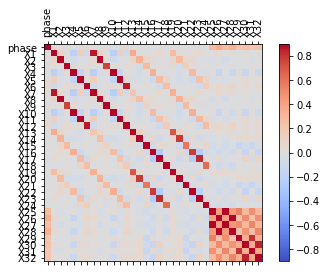

In [16]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-0.9, vmax=0.9)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

### Extracting the Feautre & Label Vector 

##### See the data analysis web based version (analysis.html)

In [17]:
cols = list(df.columns)
features = cols
features = [e for e in features if e not in {'phase', 'X27', 'X28', 'X4', 'X5', 'X8'}]

In [18]:
len(features)

27

In [19]:
X = df[features]
y = df['phase']
X.head()

,X1,X2,X3,X6,X7,X9,X10,X11,X12,X13,...,X21,X22,X23,X24,X25,X26,X29,X30,X31,X32
3820,0.000506,-0.014290,0.002058,-0.001849,0.000216,0.001810,0.001850,0.005564,-0.001127,0.000070,...,0.000632,0.000074,-0.000370,0.000086,0.014447,0.010926,0.003493,0.000930,0.002380,0.000387
3569,-0.000369,0.007638,0.000249,0.003746,-0.000091,0.000052,0.006865,0.010088,0.003441,0.001683,...,-0.000366,-0.000034,-0.004592,0.000147,0.007651,0.015948,0.002080,0.003989,0.002063,0.004595
1904,-0.005286,0.006858,0.001139,-0.000143,-0.004316,0.000953,0.001524,-0.002829,0.000156,0.000307,...,-0.000089,0.000062,-0.000163,0.000023,0.008733,0.002738,0.000360,0.000022,0.000366,0.000176
2273,-0.000934,0.000828,0.000065,-0.000046,-0.000487,-0.000057,-0.000395,-0.000098,-0.000069,0.000008,...,0.000027,0.000028,0.000012,0.000003,0.001250,0.000771,0.000013,0.000055,0.000059,0.000030
1487,-0.018029,0.019607,0.000114,0.002521,-0.016448,0.001457,0.013647,0.011104,0.003198,-0.001651,...,-0.000002,0.000902,-0.000660,0.000354,0.026636,0.015164,0.001733,0.001249,0.002410,0.001172


## Handling Imbalanced Dataset

### Perform under-sampling by generating centroids based on clustering methods. Method that under samples the majority class by replacing a cluster of majority samples by the cluster centroid of a KMeans algorithm. This algorithm keeps N majority samples by fitting the KMeans algorithm with N cluster to the majority class and using the coordinates of the N cluster centroids as the new majority samples.

### here we will resample only the majority class to be equal to the minority class which contains 998 samples.

### Therefore we got 998 cluster which means 998 sample in the majority class.

### Finally we got: 998 * 2 = 1996 total sample

In [20]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids()
X, y = cc.fit_sample(X, y)
X.shape

Using TensorFlow backend.
C:\Users\Yassine\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Yassine\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Yassine\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Yassine\Anaconda3\lib\site-packages\tensorflow\python\framework\d

(1996, 27)

## Splitting into Test & Train (75:25)

### Since we are using cross validation, we don't need to divide our data into training and test sets. We want all of the data in the training set so that we can apply cross validation on that. The simplest way to do this is to set the value for the test_size parameter to 0. This will return all the data in the training set as follows:

In [21]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)

### Normalizing the Dataset for Easier Parameter Selection

In [22]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
X = StandardScaler().fit_transform(X)

In [24]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1497, 27) (1497,)
(499, 27) (499,)


In [25]:
# Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=27)

pca.fit(X_train)


PCA(copy=True, iterated_power='auto', n_components=27, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

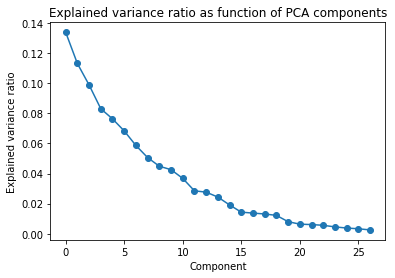

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(list(pca.explained_variance_ratio_),'-o')
plt.title('Explained variance ratio as function of PCA components')
plt.ylabel('Explained variance ratio')
plt.xlabel('Component')
plt.show()

### Create 'reduced_data' - a Feature Dataframe containing PCA components explaining Maximum Variance

In [27]:
# We reduce the data to twenty dimensions using PCA
pca = PCA(n_components=17)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
#print(reduced_data[:10])  # print upto 10 elements

In [28]:
X_train.shape

(1497, 17)

# 1. SVM

In [29]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
SVM = SVC(kernel = 'rbf', random_state = 0)
SVM.fit(X_train, y_train)

# Train accuracy
scores = model_selection.cross_val_score(SVM, X_train, y_train, cv=5)
print (scores)
print (scores.mean())

C:\Users\Yassine\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Yassine\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Yassine\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Yassine\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: Fut

[0.88333333 0.89333333 0.89966555 0.91973244 0.92976589]
0.9051661092530658


C:\Users\Yassine\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [30]:
from time import time
from sklearn.metrics import accuracy_score

# Predicting the Test set results
y_pred = SVM.predict(X_test)

tt0=time()

print ("cross result========")
#scores = model_selection.cross_val_score(SVM, X_test, y_test, cv=3)
#print(scores)
#print (scores.mean())
#print (scores.std())

print ("Acurracy: ", SVM.score(X_test,y_test) )


tt1=time()
print ("\n")
print ("time elapsed: ", tt1-tt0)
print ("\n")

cross result========
Acurracy:  0.9298597194388778


time elapsed:  0.014960765838623047




In [31]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 50, 75, 100], 'kernel': ['linear']},
              {'C': [1, 10, 50, 75, 100], 'kernel': ['rbf'], 'gamma': [0.05, 0.06, 0.07, 0.08, 0.09,0.1, 0.15, 0.2, 0.3]}]
grid_search = GridSearchCV(estimator = SVM,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_parameters)

{'C': 10, 'gamma': 0.15, 'kernel': 'rbf'}


In [32]:
# Fitting SVM to the best parameters

from sklearn.svm import SVC
SVM = SVC(kernel = 'rbf', C=10, gamma=0.15)
SVM.fit(X_train, y_train)
scores = model_selection.cross_val_score(SVM, X_train, y_train, cv=5)
print (scores)
print (scores.mean())

[0.90333333 0.91333333 0.91638796 0.9264214  0.94983278]
0.9218617614269788


In [33]:
# Testing our best SVM

print ("Acurracy: ", SVM.score(X_test,y_test) )

#scores = model_selection.cross_val_score(SVM, X_test, y_test, cv=3)
#print(scores)
#print (scores.mean())
#print (scores.std())

Acurracy:  0.9318637274549099


# 2. Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
rf.fit(X_train, y_train)

# Train accuracy
scores = model_selection.cross_val_score(rf, X_train, y_train, cv=5)
print (scores)
print (scores.mean())

[0.86       0.89666667 0.90301003 0.91304348 0.92976589]
0.9004972129319956


In [35]:
from time import time
from sklearn.metrics import accuracy_score

# Predicting the Test set results
#y_pred = rf.predict(X_test)

tt0=time()

print ("Acurracy: ", rf.score(X_test,y_test) )

#print ("cross result========")
#scores = model_selection.cross_val_score(rf, X_test, y_test, cv=3)
#print(scores)
#print (scores.mean())
#print (scores.std())

tt1=time()
print ("\n")
print ("time elapsed: ", tt1-tt0)
print ("\n")

Acurracy:  0.9118236472945892


time elapsed:  0.003990650177001953




In [42]:
# Grid Search for best parameters
parameters = {
    'n_estimators': [10, 50, 100, 300, 500, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator = rf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_parameters)

{'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 1000}


In [43]:
# Fitting R.F. to the best parameters
# 100 entro false
rf = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', bootstrap = False)
rf.fit(X_train, y_train)

scores = model_selection.cross_val_score(rf, X_train, y_train, cv=5)
print (scores)
print (scores.mean())

[0.9        0.90666667 0.89297659 0.91304348 0.92976589]
0.9084905239687849


In [44]:
# Testing our best R.F.

print ("Acurracy: ", rf.score(X_test,y_test))


#scores = model_selection.cross_val_score(rf, X_test, y_test, cv=3)
#print(scores)
#print (scores.mean())
#print (scores.std())

Acurracy:  0.9178356713426854


# 3. ANN

In [30]:
# Importing the Keras libraries and packages
import numpy as np
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

# Create function returning a compiled network
def create_network():
    
    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu', input_dim = 17))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu'))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation='sigmoid'))

    # Compile neural network
    network.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy']) # Accuracy performance metric
    
    # Return compiled network
    return network

# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=64, 
                                 batch_size=16)

In [31]:
# Evaluate neural network
#neural_network.fit(X_train, y_train)

history = neural_network.fit(X_train, y_train, validation_data=(X_test,y_test))
neural_network.model.summary()







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 1497 samples, validate on 499 samples
Epoch 1/64
1497/1497 [==============================] - 4s 3ms/step - loss: 0.4743 - acc: 0.8196 - val_loss: 0.4159 - val_acc: 0.8637
Epoch 2/64
1497/1497 [==============================] - 0s 294us/step - loss: 0.3259 - acc: 0.8871 - val_loss: 0.3541 - val_acc: 0.8758
Epoch 3/64
1497/1497 [==============================] - 0s 303us/step - loss: 0.2730 - acc: 0.8958 - val_loss: 0.3430 - val_acc: 0.8758
Epoch 4/64
1497/1497 [==============================] - 0s 273us/step - loss: 0.2525 - acc: 0.9051 - val_loss: 0.3367 - val_acc: 0.8778
Epoch 5/64
1497/1497 [==============================] - 0s 304us/step - loss: 0.2385 - acc: 0.9092 - val_loss: 0.3408 - val_acc: 0.8778
Epoch 6/64
1497/1497 [==============================] - 0s 301us/step - loss: 0.2301 - acc: 0.9105 - val_loss: 0.3312 - val_acc: 0.8838
Epoch 7/64
1497/1497 [=================

In [33]:
# Evaluate neural network using 5-fold cross-validation before optimization
score=cross_val_score(neural_network, X_train, y_train, cv=5)
print(score)
print(score.mean())


Epoch 1/64
1197/1197 [==============================] - 1s 419us/step - loss: 0.5208 - acc: 0.7903
Epoch 2/64
1197/1197 [==============================] - 0s 241us/step - loss: 0.3838 - acc: 0.8538
Epoch 3/64
1197/1197 [==============================] - 0s 230us/step - loss: 0.3192 - acc: 0.8730
Epoch 4/64
1197/1197 [==============================] - 0s 250us/step - loss: 0.2882 - acc: 0.8789
Epoch 5/64
1197/1197 [==============================] - 0s 235us/step - loss: 0.2728 - acc: 0.8855
Epoch 6/64
1197/1197 [==============================] - 0s 249us/step - loss: 0.2603 - acc: 0.8881
Epoch 7/64
1197/1197 [==============================] - 0s 235us/step - loss: 0.2495 - acc: 0.8947
Epoch 8/64
1197/1197 [==============================] - 0s 224us/step - loss: 0.2412 - acc: 0.8989
Epoch 9/64
1197/1197 [==============================] - 0s 235us/step - loss: 0.2343 - acc: 0.9023
Epoch 10/64
1197/1197 [==============================] - 0s 236us/step - loss: 0.2272 - acc: 0.9031
Epoch 11/

1198/1198 [==============================] - 0s 225us/step - loss: 0.1520 - acc: 0.9424
Epoch 36/64
1198/1198 [==============================] - 0s 219us/step - loss: 0.1498 - acc: 0.9416
Epoch 37/64
1198/1198 [==============================] - 0s 226us/step - loss: 0.1491 - acc: 0.9441
Epoch 38/64
1198/1198 [==============================] - 0s 240us/step - loss: 0.1479 - acc: 0.9424
Epoch 39/64
1198/1198 [==============================] - 0s 204us/step - loss: 0.1457 - acc: 0.9457
Epoch 40/64
1198/1198 [==============================] - 0s 227us/step - loss: 0.1436 - acc: 0.9474
Epoch 41/64
1198/1198 [==============================] - 0s 217us/step - loss: 0.1426 - acc: 0.9466
Epoch 42/64
1198/1198 [==============================] - 0s 230us/step - loss: 0.1406 - acc: 0.9499
Epoch 43/64
1198/1198 [==============================] - 0s 213us/step - loss: 0.1401 - acc: 0.9482
Epoch 44/64
1198/1198 [==============================] - 0s 228us/step - loss: 0.1379 - acc: 0.9499
Epoch 45/64


In [33]:
#Test Accuracy before optimization
test_accuracy = neural_network.score(X_test, y_test)
test_accuracy

499/499 [==============================] - 0s 94us/step


0.8777555110220441

In [34]:
# Importing the Keras libraries and packages
import numpy as np
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

# Create function returning a compiled network
def create_network( optimizer):
    
    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16,kernel_initializer="uniform", activation='relu', input_dim = 17))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu'))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation='sigmoid'))

    # Compile neural network
    network.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer=optimizer, # Root Mean Square Propagation
                    metrics=['accuracy']) # Accuracy performance metric
    
    # Return compiled network
    return network

# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network)


# grid search epochs, batch size and optimizer
optimizers = ['adam', 'rmsprop']
epochs = [32,64]
batches = [8, 16]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)
grid = GridSearchCV(estimator=neural_network, param_grid=param_grid, cv=5)
grid_result = grid.fit(X_train, y_train)

Epoch 1/32
1197/1197 [==============================] - 1s 852us/step - loss: 0.5656 - acc: 0.8012
Epoch 2/32
1197/1197 [==============================] - 1s 498us/step - loss: 0.2777 - acc: 0.8906
Epoch 3/32
1197/1197 [==============================] - 1s 497us/step - loss: 0.2297 - acc: 0.9023
Epoch 4/32
1197/1197 [==============================] - 1s 524us/step - loss: 0.2150 - acc: 0.9098
Epoch 5/32
1197/1197 [==============================] - 1s 522us/step - loss: 0.2072 - acc: 0.9114
Epoch 6/32
1197/1197 [==============================] - 1s 515us/step - loss: 0.2006 - acc: 0.9140
Epoch 7/32
1197/1197 [==============================] - 1s 562us/step - loss: 0.1951 - acc: 0.9206
Epoch 8/32
1197/1197 [==============================] - 1s 498us/step - loss: 0.1889 - acc: 0.9198
Epoch 9/32
1197/1197 [==============================] - 1s 497us/step - loss: 0.1835 - acc: 0.9290
Epoch 10/32
1197/1197 [==============================] - 1s 498us/step - loss: 0.1801 - acc: 0.9265
Epoch 11/

1198/1198 [==============================] - 1s 522us/step - loss: 0.1605 - acc: 0.9482
Epoch 19/32
1198/1198 [==============================] - 1s 510us/step - loss: 0.1578 - acc: 0.9466
Epoch 20/32
1198/1198 [==============================] - 1s 510us/step - loss: 0.1582 - acc: 0.9474
Epoch 21/32
1198/1198 [==============================] - 1s 512us/step - loss: 0.1566 - acc: 0.9482
Epoch 22/32
1198/1198 [==============================] - 1s 512us/step - loss: 0.1546 - acc: 0.9466
Epoch 23/32
1198/1198 [==============================] - 1s 507us/step - loss: 0.1534 - acc: 0.9466
Epoch 24/32
1198/1198 [==============================] - 1s 511us/step - loss: 0.1514 - acc: 0.9482
Epoch 25/32
1198/1198 [==============================] - 1s 523us/step - loss: 0.1494 - acc: 0.9474
Epoch 26/32
1198/1198 [==============================] - 1s 524us/step - loss: 0.1482 - acc: 0.9491
Epoch 27/32
1198/1198 [==============================] - 1s 525us/step - loss: 0.1459 - acc: 0.9449
Epoch 28/32


1198/1198 [==============================] - 1s 549us/step - loss: 0.1688 - acc: 0.9391
Epoch 20/32
1198/1198 [==============================] - 1s 625us/step - loss: 0.1654 - acc: 0.9432
Epoch 21/32
1198/1198 [==============================] - 1s 553us/step - loss: 0.1654 - acc: 0.9424
Epoch 22/32
1198/1198 [==============================] - 1s 523us/step - loss: 0.1653 - acc: 0.9432
Epoch 23/32
1198/1198 [==============================] - 1s 538us/step - loss: 0.1629 - acc: 0.9432
Epoch 24/32
1198/1198 [==============================] - 1s 509us/step - loss: 0.1606 - acc: 0.9432
Epoch 25/32
1198/1198 [==============================] - 1s 534us/step - loss: 0.1617 - acc: 0.9424
Epoch 26/32
1198/1198 [==============================] - 1s 499us/step - loss: 0.1595 - acc: 0.9466
Epoch 27/32
1198/1198 [==============================] - 1s 497us/step - loss: 0.1570 - acc: 0.9424
Epoch 28/32
1198/1198 [==============================] - 1s 549us/step - loss: 0.1570 - acc: 0.9424
Epoch 29/32


1197/1197 [==============================] - 1s 580us/step - loss: 0.1621 - acc: 0.9398
Epoch 21/64
1197/1197 [==============================] - 1s 599us/step - loss: 0.1561 - acc: 0.9407 0s - loss: 0.1546 - acc: 0.9
Epoch 22/64
1197/1197 [==============================] - 1s 576us/step - loss: 0.1569 - acc: 0.9449
Epoch 23/64
1197/1197 [==============================] - 1s 594us/step - loss: 0.1529 - acc: 0.9449
Epoch 24/64
1197/1197 [==============================] - 1s 599us/step - loss: 0.1528 - acc: 0.9465
Epoch 25/64
1197/1197 [==============================] - 1s 597us/step - loss: 0.1518 - acc: 0.9449
Epoch 26/64
1197/1197 [==============================] - 1s 608us/step - loss: 0.1488 - acc: 0.9457
Epoch 27/64
1197/1197 [==============================] - 1s 615us/step - loss: 0.1495 - acc: 0.9490
Epoch 28/64
1197/1197 [==============================] - 1s 645us/step - loss: 0.1460 - acc: 0.9482
Epoch 29/64
1197/1197 [==============================] - 1s 599us/step - loss: 0.14

1198/1198 [==============================] - 1s 575us/step - loss: 0.1042 - acc: 0.9649
Epoch 53/64
1198/1198 [==============================] - 1s 593us/step - loss: 0.1027 - acc: 0.9658
Epoch 54/64
1198/1198 [==============================] - 1s 599us/step - loss: 0.0974 - acc: 0.9691
Epoch 55/64
1198/1198 [==============================] - 1s 588us/step - loss: 0.0986 - acc: 0.9683
Epoch 56/64
1198/1198 [==============================] - 1s 580us/step - loss: 0.0972 - acc: 0.9699
Epoch 57/64
1198/1198 [==============================] - 1s 690us/step - loss: 0.0960 - acc: 0.9699
Epoch 58/64
1198/1198 [==============================] - 1s 616us/step - loss: 0.0955 - acc: 0.9674
Epoch 59/64
1198/1198 [==============================] - 1s 808us/step - loss: 0.0933 - acc: 0.9716
Epoch 60/64
1198/1198 [==============================] - 1s 707us/step - loss: 0.0906 - acc: 0.9708
Epoch 61/64
1198/1198 [==============================] - 1s 641us/step - loss: 0.0940 - acc: 0.9683
Epoch 62/64


1197/1197 [==============================] - 1s 763us/step - loss: 0.1755 - acc: 0.9348
Epoch 23/64
1197/1197 [==============================] - 1s 742us/step - loss: 0.1746 - acc: 0.9348
Epoch 24/64
1197/1197 [==============================] - 1s 787us/step - loss: 0.1740 - acc: 0.9323
Epoch 25/64
1197/1197 [==============================] - 1s 812us/step - loss: 0.1723 - acc: 0.9340
Epoch 26/64
1197/1197 [==============================] - 1s 709us/step - loss: 0.1710 - acc: 0.9323
Epoch 27/64
1197/1197 [==============================] - 1s 730us/step - loss: 0.1689 - acc: 0.9323
Epoch 28/64
1197/1197 [==============================] - 1s 753us/step - loss: 0.1655 - acc: 0.9390
Epoch 29/64
1197/1197 [==============================] - 1s 757us/step - loss: 0.1645 - acc: 0.9390
Epoch 30/64
1197/1197 [==============================] - 1s 742us/step - loss: 0.1628 - acc: 0.9390
Epoch 31/64
1197/1197 [==============================] - 1s 799us/step - loss: 0.1621 - acc: 0.9382
Epoch 32/64


1198/1198 [==============================] - 1s 737us/step - loss: 0.1204 - acc: 0.9566 0s - loss: 0.1118 - acc: 0.9
Epoch 57/64
1198/1198 [==============================] - 1s 703us/step - loss: 0.1188 - acc: 0.9599
Epoch 58/64
1198/1198 [==============================] - 1s 707us/step - loss: 0.1188 - acc: 0.9574
Epoch 59/64
1198/1198 [==============================] - 1s 682us/step - loss: 0.1181 - acc: 0.9574
Epoch 60/64
1198/1198 [==============================] - 1s 690us/step - loss: 0.1139 - acc: 0.9616
Epoch 61/64
1198/1198 [==============================] - 1s 686us/step - loss: 0.1162 - acc: 0.9574
Epoch 62/64
1198/1198 [==============================] - 1s 688us/step - loss: 0.1138 - acc: 0.9583
Epoch 63/64
1198/1198 [==============================] - 1s 698us/step - loss: 0.1127 - acc: 0.9616
Epoch 64/64
299/299 [==============================] - 1s 2ms/step
Epoch 1/64
1198/1198 [==============================] - 2s 2ms/step - loss: 0.5962 - acc: 0.8372
Epoch 2/64
1198/119

1197/1197 [==============================] - 1s 420us/step - loss: 0.2041 - acc: 0.9081
Epoch 9/32
1197/1197 [==============================] - 0s 366us/step - loss: 0.2014 - acc: 0.9148
Epoch 10/32
1197/1197 [==============================] - 0s 381us/step - loss: 0.1966 - acc: 0.9131
Epoch 11/32
1197/1197 [==============================] - 0s 370us/step - loss: 0.1937 - acc: 0.9156
Epoch 12/32
1197/1197 [==============================] - 0s 367us/step - loss: 0.1895 - acc: 0.9173
Epoch 13/32
1197/1197 [==============================] - 0s 376us/step - loss: 0.1869 - acc: 0.9215
Epoch 14/32
1197/1197 [==============================] - 0s 393us/step - loss: 0.1862 - acc: 0.9181
Epoch 15/32
1197/1197 [==============================] - 0s 379us/step - loss: 0.1821 - acc: 0.9206
Epoch 16/32
1197/1197 [==============================] - 0s 367us/step - loss: 0.1798 - acc: 0.9248
Epoch 17/32
1197/1197 [==============================] - 1s 448us/step - loss: 0.1771 - acc: 0.9282
Epoch 18/32
1

1197/1197 [==============================] - 0s 368us/step - loss: 0.2172 - acc: 0.9131
Epoch 8/32
1197/1197 [==============================] - 0s 375us/step - loss: 0.2123 - acc: 0.9156
Epoch 9/32
1197/1197 [==============================] - 0s 366us/step - loss: 0.2094 - acc: 0.9165
Epoch 10/32
1197/1197 [==============================] - 0s 368us/step - loss: 0.2056 - acc: 0.9173
Epoch 11/32
1197/1197 [==============================] - 0s 366us/step - loss: 0.2028 - acc: 0.9165
Epoch 12/32
1197/1197 [==============================] - 0s 370us/step - loss: 0.1998 - acc: 0.9190
Epoch 13/32
1197/1197 [==============================] - 0s 380us/step - loss: 0.1976 - acc: 0.9173
Epoch 14/32
1197/1197 [==============================] - 0s 376us/step - loss: 0.1944 - acc: 0.9165
Epoch 15/32
1197/1197 [==============================] - 0s 367us/step - loss: 0.1920 - acc: 0.9256
Epoch 16/32
1197/1197 [==============================] - 0s 353us/step - loss: 0.1904 - acc: 0.9198
Epoch 17/32
11

1197/1197 [==============================] - 0s 397us/step - loss: 0.2008 - acc: 0.9156
Epoch 9/64
1197/1197 [==============================] - 1s 420us/step - loss: 0.1946 - acc: 0.9148
Epoch 10/64
1197/1197 [==============================] - 1s 433us/step - loss: 0.1912 - acc: 0.9190
Epoch 11/64
1197/1197 [==============================] - 0s 393us/step - loss: 0.1865 - acc: 0.9240
Epoch 12/64
1197/1197 [==============================] - 0s 413us/step - loss: 0.1828 - acc: 0.9223
Epoch 13/64
1197/1197 [==============================] - 0s 406us/step - loss: 0.1796 - acc: 0.9240
Epoch 14/64
1197/1197 [==============================] - 1s 419us/step - loss: 0.1773 - acc: 0.9231
Epoch 15/64
1197/1197 [==============================] - 0s 406us/step - loss: 0.1727 - acc: 0.9240
Epoch 16/64
1197/1197 [==============================] - 0s 406us/step - loss: 0.1700 - acc: 0.9282
Epoch 17/64
1197/1197 [==============================] - 0s 380us/step - loss: 0.1672 - acc: 0.9348
Epoch 18/64
1

1198/1198 [==============================] - 0s 378us/step - loss: 0.1299 - acc: 0.9533
Epoch 43/64
1198/1198 [==============================] - 0s 357us/step - loss: 0.1281 - acc: 0.9541
Epoch 44/64
1198/1198 [==============================] - 0s 342us/step - loss: 0.1262 - acc: 0.9558
Epoch 45/64
1198/1198 [==============================] - 0s 347us/step - loss: 0.1257 - acc: 0.9516
Epoch 46/64
1198/1198 [==============================] - 0s 353us/step - loss: 0.1241 - acc: 0.9524
Epoch 47/64
1198/1198 [==============================] - 0s 368us/step - loss: 0.1233 - acc: 0.9583
Epoch 48/64
1198/1198 [==============================] - 0s 343us/step - loss: 0.1227 - acc: 0.9583
Epoch 49/64
1198/1198 [==============================] - 0s 337us/step - loss: 0.1228 - acc: 0.9541
Epoch 50/64
1198/1198 [==============================] - 0s 341us/step - loss: 0.1201 - acc: 0.9583
Epoch 51/64
1198/1198 [==============================] - 0s 328us/step - loss: 0.1179 - acc: 0.9599
Epoch 52/64


1197/1197 [==============================] - 0s 314us/step - loss: 0.2085 - acc: 0.9173
Epoch 13/64
1197/1197 [==============================] - 0s 332us/step - loss: 0.2050 - acc: 0.9181
Epoch 14/64
1197/1197 [==============================] - 0s 328us/step - loss: 0.2046 - acc: 0.9165
Epoch 15/64
1197/1197 [==============================] - 0s 334us/step - loss: 0.2022 - acc: 0.9140
Epoch 16/64
1197/1197 [==============================] - 0s 328us/step - loss: 0.2015 - acc: 0.9181
Epoch 17/64
1197/1197 [==============================] - 0s 344us/step - loss: 0.1983 - acc: 0.9173
Epoch 18/64
1197/1197 [==============================] - 0s 328us/step - loss: 0.1979 - acc: 0.9165
Epoch 19/64
1197/1197 [==============================] - 0s 336us/step - loss: 0.1960 - acc: 0.9173
Epoch 20/64
1197/1197 [==============================] - 0s 328us/step - loss: 0.1954 - acc: 0.9223
Epoch 21/64
1197/1197 [==============================] - 0s 319us/step - loss: 0.1926 - acc: 0.9190
Epoch 22/64


1198/1198 [==============================] - 0s 336us/step - loss: 0.1425 - acc: 0.9466
Epoch 47/64
1198/1198 [==============================] - 0s 327us/step - loss: 0.1403 - acc: 0.9491
Epoch 48/64
1198/1198 [==============================] - 0s 329us/step - loss: 0.1415 - acc: 0.9482
Epoch 49/64
1198/1198 [==============================] - 0s 330us/step - loss: 0.1388 - acc: 0.9508
Epoch 50/64
1198/1198 [==============================] - 0s 323us/step - loss: 0.1398 - acc: 0.9516
Epoch 51/64
1198/1198 [==============================] - 0s 328us/step - loss: 0.1388 - acc: 0.9508
Epoch 52/64
1198/1198 [==============================] - 0s 353us/step - loss: 0.1367 - acc: 0.9533
Epoch 53/64
1198/1198 [==============================] - 0s 399us/step - loss: 0.1355 - acc: 0.9466
Epoch 54/64
1198/1198 [==============================] - 0s 337us/step - loss: 0.1353 - acc: 0.9499
Epoch 55/64
1198/1198 [==============================] - 0s 361us/step - loss: 0.1329 - acc: 0.9516
Epoch 56/64


1497/1497 [==============================] - 1s 356us/step - loss: 0.1792 - acc: 0.9319
Epoch 16/32
1497/1497 [==============================] - 1s 356us/step - loss: 0.1787 - acc: 0.9305
Epoch 17/32
1497/1497 [==============================] - ETA: 0s - loss: 0.1729 - acc: 0.939 - 1s 356us/step - loss: 0.1746 - acc: 0.9379
Epoch 18/32
1497/1497 [==============================] - 1s 346us/step - loss: 0.1726 - acc: 0.9345
Epoch 19/32
1497/1497 [==============================] - 1s 356us/step - loss: 0.1704 - acc: 0.9372
Epoch 20/32
1497/1497 [==============================] - 1s 356us/step - loss: 0.1684 - acc: 0.9365
Epoch 21/32
1497/1497 [==============================] - 1s 346us/step - loss: 0.1657 - acc: 0.9372
Epoch 22/32
1497/1497 [==============================] - 1s 386us/step - loss: 0.1660 - acc: 0.9405
Epoch 23/32
1497/1497 [==============================] - 1s 336us/step - loss: 0.1625 - acc: 0.9405
Epoch 24/32
1497/1497 [==============================] - 1s 356us/step - l

In [36]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.912492 using {'batch_size': 16, 'epochs': 32, 'optimizer': 'adam'}
0.909820 (0.011015) with: {'batch_size': 8, 'epochs': 32, 'optimizer': 'adam'}
0.912492 (0.017348) with: {'batch_size': 8, 'epochs': 32, 'optimizer': 'rmsprop'}
0.907148 (0.015282) with: {'batch_size': 8, 'epochs': 64, 'optimizer': 'adam'}
0.903808 (0.006530) with: {'batch_size': 8, 'epochs': 64, 'optimizer': 'rmsprop'}
0.912492 (0.019880) with: {'batch_size': 16, 'epochs': 32, 'optimizer': 'adam'}
0.911824 (0.017146) with: {'batch_size': 16, 'epochs': 32, 'optimizer': 'rmsprop'}
0.907816 (0.006850) with: {'batch_size': 16, 'epochs': 64, 'optimizer': 'adam'}
0.906480 (0.008962) with: {'batch_size': 16, 'epochs': 64, 'optimizer': 'rmsprop'}


In [37]:
# Importing the Keras libraries and packages
import numpy as np
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

# Create function returning a compiled network
def create_network():
    
    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu', input_dim = 17))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu'))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation='sigmoid'))

    # Compile neural network
    network.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='adam', # Root Mean Square Propagation
                    metrics=['accuracy']) # Accuracy performance metric
    
    # Return compiled network
    return network

# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=32, 
                                 batch_size=16)

In [38]:
# Evaluate neural network
neural_network.fit(X_train, y_train)
neural_network.model.summary()


Epoch 1/32
1497/1497 [==============================] - 3s 2ms/step - loss: 0.5628 - acc: 0.7629
Epoch 2/32
1497/1497 [==============================] - 0s 289us/step - loss: 0.3829 - acc: 0.8490
Epoch 3/32
1497/1497 [==============================] - 0s 305us/step - loss: 0.2962 - acc: 0.8824
Epoch 4/32
1497/1497 [==============================] - 0s 304us/step - loss: 0.2605 - acc: 0.8931
Epoch 5/32
1497/1497 [==============================] - 0s 304us/step - loss: 0.2413 - acc: 0.9071
Epoch 6/32
1497/1497 [==============================] - 0s 309us/step - loss: 0.2288 - acc: 0.9092
Epoch 7/32
1497/1497 [==============================] - 0s 299us/step - loss: 0.2204 - acc: 0.9092
Epoch 8/32
1497/1497 [==============================] - 0s 315us/step - loss: 0.2145 - acc: 0.9125
Epoch 9/32
1497/1497 [==============================] - 0s 300us/step - loss: 0.2086 - acc: 0.9132
Epoch 10/32
1497/1497 [==============================] - 0s 305us/step - loss: 0.2049 - acc: 0.9125
Epoch 11/32

In [39]:
# Evaluate neural network using 5-fold cross-validation after optimization
score=cross_val_score(neural_network, X_train, y_train, cv=5)
print(score)
print(score.mean())

Epoch 1/32
1197/1197 [==============================] - 2s 2ms/step - loss: 0.5824 - acc: 0.8028
Epoch 2/32
1197/1197 [==============================] - 0s 311us/step - loss: 0.4531 - acc: 0.8730
Epoch 3/32
1197/1197 [==============================] - 0s 353us/step - loss: 0.3513 - acc: 0.8855
Epoch 4/32
1197/1197 [==============================] - 0s 329us/step - loss: 0.2866 - acc: 0.8906
Epoch 5/32
1197/1197 [==============================] - 0s 330us/step - loss: 0.2581 - acc: 0.8956
Epoch 6/32
1197/1197 [==============================] - 0s 323us/step - loss: 0.2420 - acc: 0.8997
Epoch 7/32
1197/1197 [==============================] - 0s 302us/step - loss: 0.2324 - acc: 0.8997
Epoch 8/32
1197/1197 [==============================] - 0s 305us/step - loss: 0.2250 - acc: 0.9031
Epoch 9/32
1197/1197 [==============================] - 0s 311us/step - loss: 0.2184 - acc: 0.9056
Epoch 10/32
1197/1197 [==============================] - 0s 301us/step - loss: 0.2132 - acc: 0.9089
Epoch 11/32

In [40]:
#Test Accuracy after optimization
test_accuracy = neural_network.score(X_test, y_test)
test_accuracy

499/499 [==============================] - 1s 2ms/step


0.9138276553106213